In [5]:
# Paths to the files
categories_file_path = '../data/categories.txt'
concepts_file_path = '../data/concepts.json'
storyboard_dir='../data/adludio storyboard examples'

First few categories:
                      Category
0             Background Image
1                         Logo
2  Call-To-Action (CTA) Button
3                         Icon
4                Product Image


C:\Users\dell\AppData\Local\Temp\ipykernel_14412\1609837250.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=categories_df, palette='viridis')


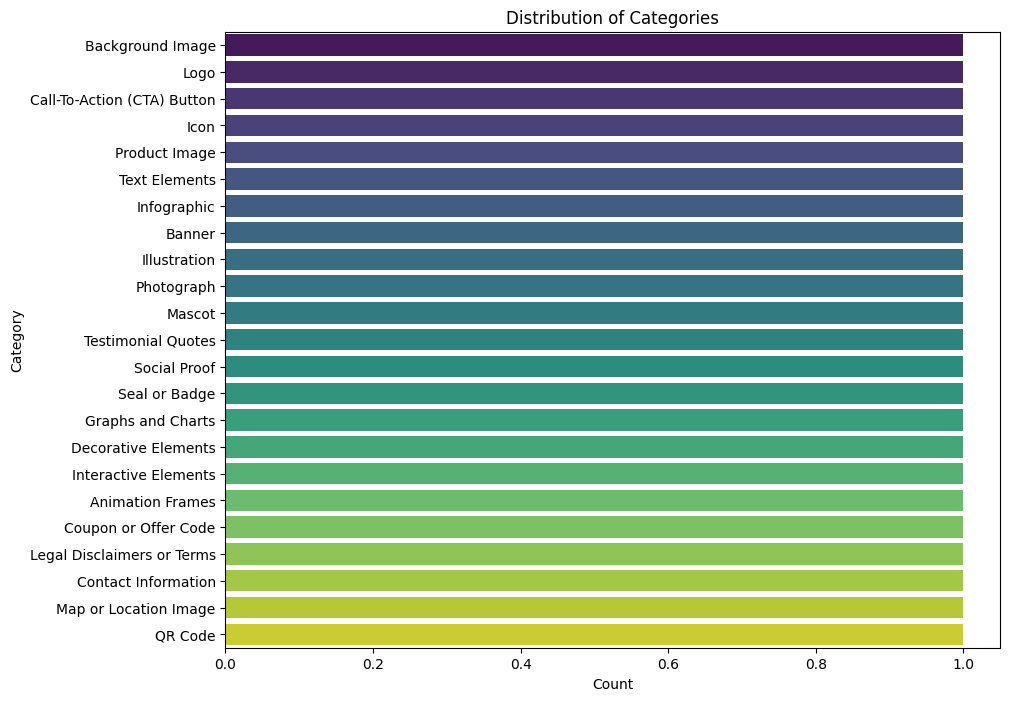

In [11]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read and explore categories.txt
def explore_categories(file_path):
    with open(file_path, 'r') as file:
        categories = file.read().strip().split('\n')
    
    # Cleaning and organizing data
    categories = [line.split('. ', 1)[1] for line in categories[1:]]  # Removing index numbers
    categories_df = pd.DataFrame(categories, columns=['Category'])
    
    # Displaying the first few categories
    print("First few categories:")
    print(categories_df.head())
    
    # Plotting the categories
    plt.figure(figsize=(10, 8))
    sns.countplot(y='Category', data=categories_df, palette='viridis')
    plt.title('Distribution of Categories')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

explore_categories(categories_file_path)



First few frames:
                    Concept    Frame  \
0   Escape Challenge Teaser  frame_1   
1   Escape Challenge Teaser  frame_2   
2   Escape Challenge Teaser  frame_3   
3  Interactive Storytelling  frame_1   
4  Interactive Storytelling  frame_2   

                                         Description Interaction Type  \
0  The ad begins with a suspenseful animation of ...              Tap   
1  The scene transitions to a series of quick, ex...            Swipe   
2  The final frame reveals the LEGO CITY 2024 log...              Tap   
3  The ad opens with a LEGO CITY set and a 'Choos...              Tap   
4  Depending on the user's choice, the scene tran...            Swipe   

     Duration                                        Explanation  
0   5 seconds  This concept aligns with LEGO CITY's brand ide...  
1  10 seconds  This concept aligns with LEGO CITY's brand ide...  
2   5 seconds  This concept aligns with LEGO CITY's brand ide...  
3   5 seconds  This concept aligns

C:\Users\dell\AppData\Local\Temp\ipykernel_14412\2111299995.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Interaction Type', data=frames_df, palette='viridis')


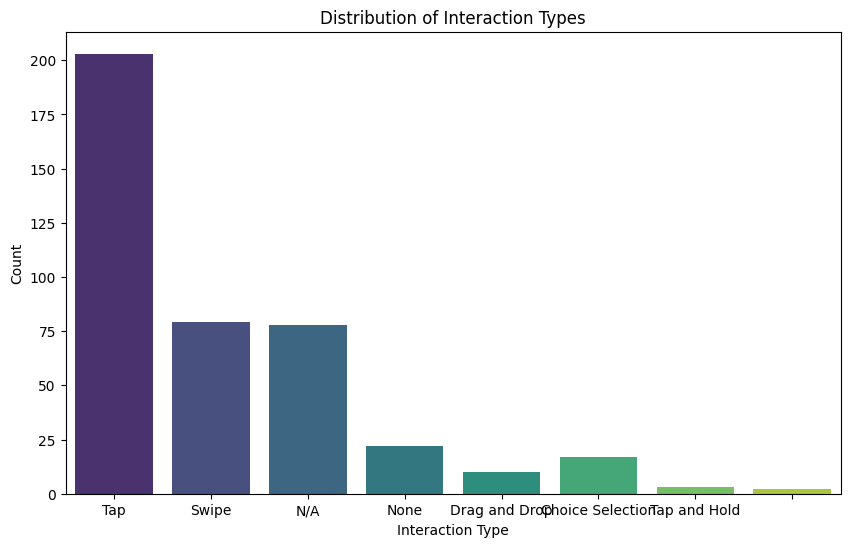

C:\Users\dell\AppData\Local\Temp\ipykernel_14412\2111299995.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(frames_df['Duration'].apply(convert_duration), kde=True, palette='viridis')


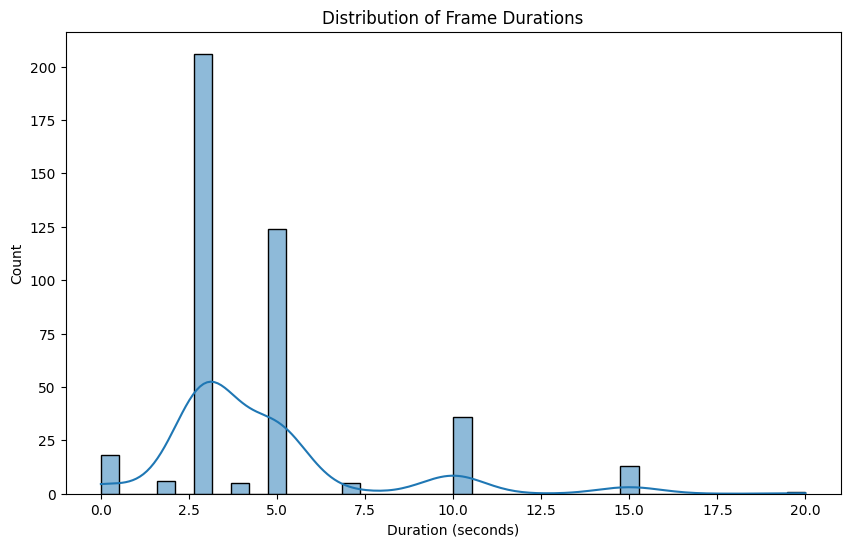

In [12]:
# Function to read and explore concepts.json
def explore_concepts(file_path):
    with open(file_path, 'r') as file:
        concepts = json.load(file)
    
    # Flattening JSON data for analysis
    frames = []
    for concept in concepts:
        concept_name = concept.get('concept')
        explanation = concept.get('explanation')
        implementation = concept.get('implementation', {})
        
        for frame_key, frame_value in implementation.items():
            frame_data = {
                'Concept': concept_name,
                'Frame': frame_key,
                'Description': frame_value.get('description'),
                'Interaction Type': frame_value.get('interaction_type', 'N/A'),
                'Duration': frame_value.get('duration', '0 seconds'),
                'Explanation': explanation
            }
            frames.append(frame_data)
    
    frames_df = pd.DataFrame(frames)
    
    print("First few frames:")
    print(frames_df.head())
    
    # Plotting the interaction types
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Interaction Type', data=frames_df, palette='viridis')
    plt.title('Distribution of Interaction Types')
    plt.xlabel('Interaction Type')
    plt.ylabel('Count')
    plt.show()

    # Handling non-numeric durations
    def convert_duration(duration):
        try:
            return int(duration.split()[0])
        except ValueError:
            return 0  # Default value for non-numeric durations

    # Plotting the durations
    plt.figure(figsize=(10, 6))
    sns.histplot(frames_df['Duration'].apply(convert_duration), kde=True, palette='viridis')
    plt.title('Distribution of Frame Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.show()

explore_concepts(concepts_file_path)


In [19]:

# Exploring the files

import os
import pandas as pd
import json
from PIL import Image
import matplotlib.pyplot as plt

# List the files in the extraction directory
files = os.listdir(storyboard_dir)
print("Storyboard example files:", files)

Storyboard example files: ['Adludio-CocaCola-[BR]-[LIVE]-ifood-christmas2033-TapAndHold-FS-V3-sb.png', 'Adludio-Detran_RS-[BR]-[LIVE]-Carnival_24-User_Choice_Quiz-FS-Version_2-Taxi.png', 'Adludio-Estee_Lauder-[UK]-[LIVE]-luxury_fragrance-cube_flip-MPU-Version_1.png', 'Adludio-google-[UK]-[RFP]-brand_saftey-swipe_left_or_right-FS-v1.png', 'Adludio-LEGO-[UK]-[RFP]-Ninjago24-Gamified-FlyingArcade-FS-V2-sb.png', 'Adludio-Microsoft-[FR]-[LIVE]-Windows_11_version_2-Swipe-MPU-v2.png', 'Adludio-Volvo-[UK]-[RFP]-Volvo_Vehicle_Electrification_XC40-Tap-FS-Version_2_AJ.png', 'Amazon-ThirteenLives_FS_600x900-storyboard.png', 'bestuy-fs-600x900-tapandhold-storyboard.png', 'boa_FS_600x900_storyboard.png', 'chevy-mpu-600x500-hotspot-storyboard.png', 'dior-fs-320x480-slider-storyboard.png', 'Disney-DrStrange-FS-600x900-UserSlider-Storyboard.png', 'ITC-FS-320x480-SensorySwipe-Storyboard-Rev.png', 'kfc-fs-320x480-sensoryvideo-storyboard.png', 'Ladbroked_FS_320x480_spinwheel_-storyboard-uk.png', 'Meta_FS_

Image Format Distribution: {'PNG': 20}
Image Mode Distribution: {'RGBA': 17, 'RGB': 3}


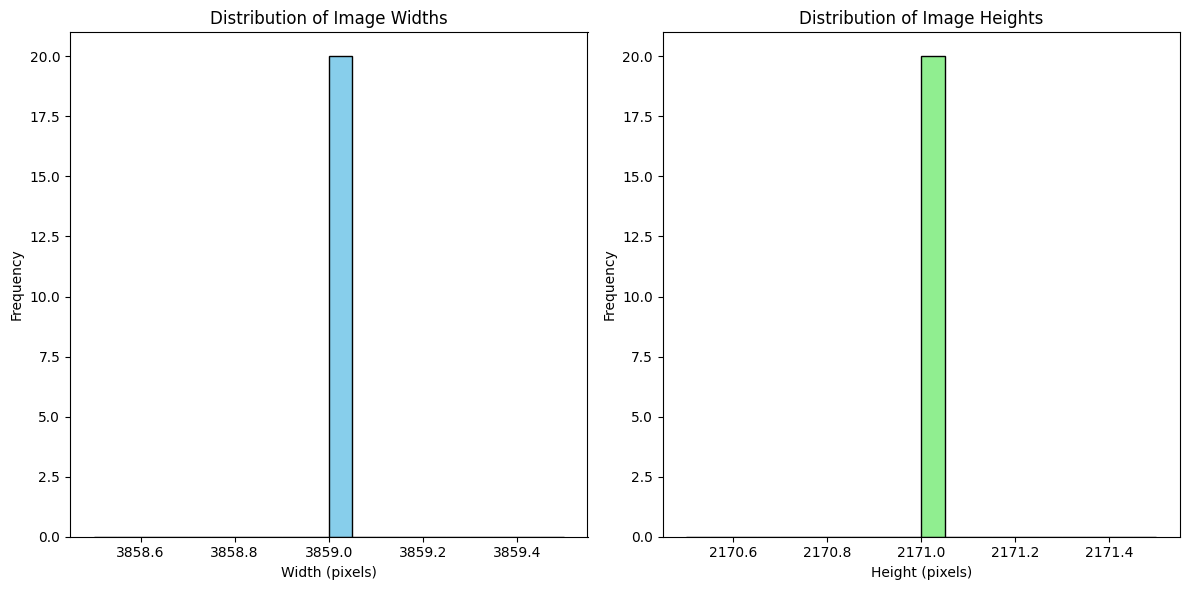

In [21]:
image_formats = []
image_modes = []
image_sizes = []

for file in files:
    file_path = os.path.join(storyboard_dir, file)
    if os.path.isfile(file_path) and file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file_path)
        image_formats.append(image.format)
        image_modes.append(image.mode)
        image_sizes.append(image.size)

format_counts = {fmt: image_formats.count(fmt) for fmt in set(image_formats)}
print("Image Format Distribution:", format_counts)

mode_counts = {mode: image_modes.count(mode) for mode in set(image_modes)}
print("Image Mode Distribution:", mode_counts)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


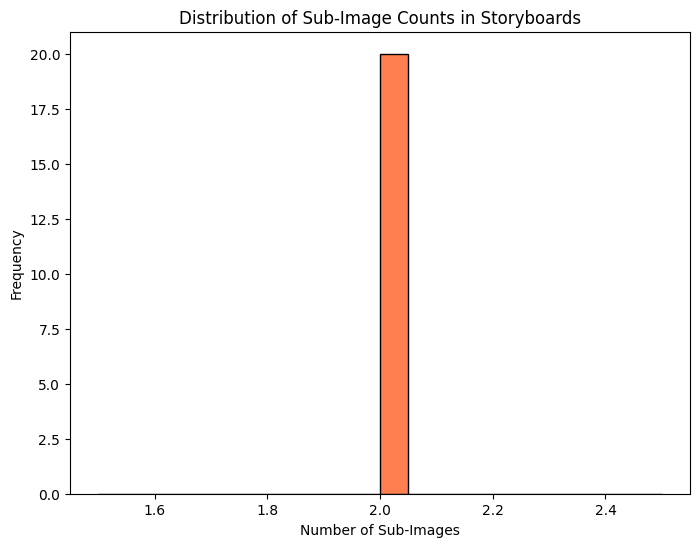

Total number of images: 21
Most common image format: PNG
Most common image mode: RGBA
Most common image width: 3859 pixels
Most common image height: 2171 pixels
Average number of ad images in a single storyboard: 2.0


In [25]:
import numpy as np


def count_sub_images(image):
    # Convert image to grayscale and apply threshold to detect edges
    gray_image = image.convert('L')
    threshold = gray_image.point(lambda p: p > 128 and 255) 
    sub_images = np.array(threshold)
    
    # Count unique regions
    unique_regions = np.unique(sub_images, return_counts=True)
    return len(unique_regions[0])

# Count sub-images in each storyboard
sub_image_counts = [count_sub_images(Image.open(os.path.join(storyboard_dir, file))) for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

# Plot the distribution of sub-image counts
plt.figure(figsize=(8, 6))
plt.hist(sub_image_counts, bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Sub-Image Counts in Storyboards')
plt.xlabel('Number of Sub-Images')
plt.ylabel('Frequency')
plt.show()

# Display basic information about the dataset
print(f"Total number of images: {len(files)}")
print(f"Most common image format: {max(format_counts, key=format_counts.get)}")
print(f"Most common image mode: {max(mode_counts, key=mode_counts.get)}")
print(f"Most common image width: {np.bincount(widths).argmax()} pixels")
print(f"Most common image height: {np.bincount(heights).argmax()} pixels")
print(f"Average number of ad images in a single storyboard: {np.mean(sub_image_counts)}")


In [3]:
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

yolo_config = '../models/yolo_model/yolov3.cfg'
yolo_weights = '../models/yolo_model/yolov3.weights'
coco_names = '../models/yolo_model/coco.names'

net = cv2.dnn.readNet(yolo_weights, yolo_config)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

with open(coco_names, 'r') as f:
    classes = [line.strip() for line in f.readlines()]


def detect_objects(image):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    return len(indexes)



In [6]:
files = os.listdir(storyboard_dir)
print("Storyboard example files:", files)

Storyboard example files: ['Adludio-CocaCola-[BR]-[LIVE]-ifood-christmas2033-TapAndHold-FS-V3-sb.png', 'Adludio-Detran_RS-[BR]-[LIVE]-Carnival_24-User_Choice_Quiz-FS-Version_2-Taxi.png', 'Adludio-Estee_Lauder-[UK]-[LIVE]-luxury_fragrance-cube_flip-MPU-Version_1.png', 'Adludio-google-[UK]-[RFP]-brand_saftey-swipe_left_or_right-FS-v1.png', 'Adludio-LEGO-[UK]-[RFP]-Ninjago24-Gamified-FlyingArcade-FS-V2-sb.png', 'Adludio-Microsoft-[FR]-[LIVE]-Windows_11_version_2-Swipe-MPU-v2.png', 'Adludio-Volvo-[UK]-[RFP]-Volvo_Vehicle_Electrification_XC40-Tap-FS-Version_2_AJ.png', 'Amazon-ThirteenLives_FS_600x900-storyboard.png', 'bestuy-fs-600x900-tapandhold-storyboard.png', 'boa_FS_600x900_storyboard.png', 'chevy-mpu-600x500-hotspot-storyboard.png', 'dior-fs-320x480-slider-storyboard.png', 'Disney-DrStrange-FS-600x900-UserSlider-Storyboard.png', 'ITC-FS-320x480-SensorySwipe-Storyboard-Rev.png', 'kfc-fs-320x480-sensoryvideo-storyboard.png', 'Ladbroked_FS_320x480_spinwheel_-storyboard-uk.png', 'Meta_FS_

Adludio-CocaCola-[BR]-[LIVE]-ifood-christmas2033-TapAndHold-FS-V3-sb.png: 0 ad images detected.
Adludio-Detran_RS-[BR]-[LIVE]-Carnival_24-User_Choice_Quiz-FS-Version_2-Taxi.png: 4 ad images detected.
Adludio-Estee_Lauder-[UK]-[LIVE]-luxury_fragrance-cube_flip-MPU-Version_1.png: 0 ad images detected.
Adludio-google-[UK]-[RFP]-brand_saftey-swipe_left_or_right-FS-v1.png: 1 ad images detected.
Adludio-LEGO-[UK]-[RFP]-Ninjago24-Gamified-FlyingArcade-FS-V2-sb.png: 1 ad images detected.
Adludio-Microsoft-[FR]-[LIVE]-Windows_11_version_2-Swipe-MPU-v2.png: 2 ad images detected.
Adludio-Volvo-[UK]-[RFP]-Volvo_Vehicle_Electrification_XC40-Tap-FS-Version_2_AJ.png: 4 ad images detected.
Amazon-ThirteenLives_FS_600x900-storyboard.png: 0 ad images detected.
bestuy-fs-600x900-tapandhold-storyboard.png: 4 ad images detected.
boa_FS_600x900_storyboard.png: 1 ad images detected.
chevy-mpu-600x500-hotspot-storyboard.png: 0 ad images detected.
dior-fs-320x480-slider-storyboard.png: 0 ad images detected.
Di

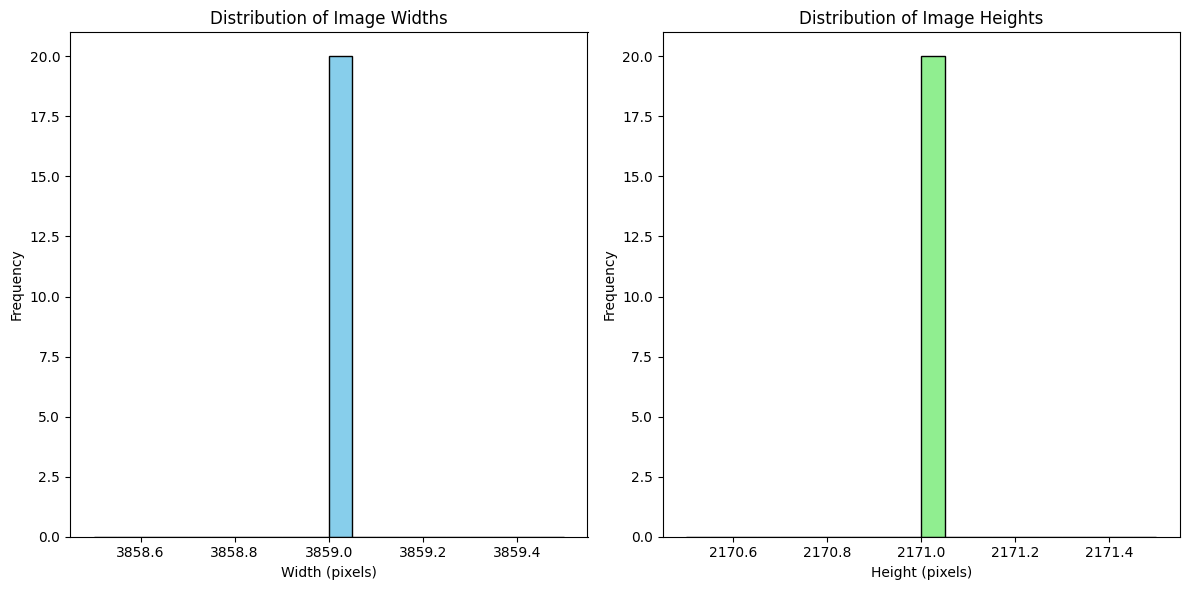

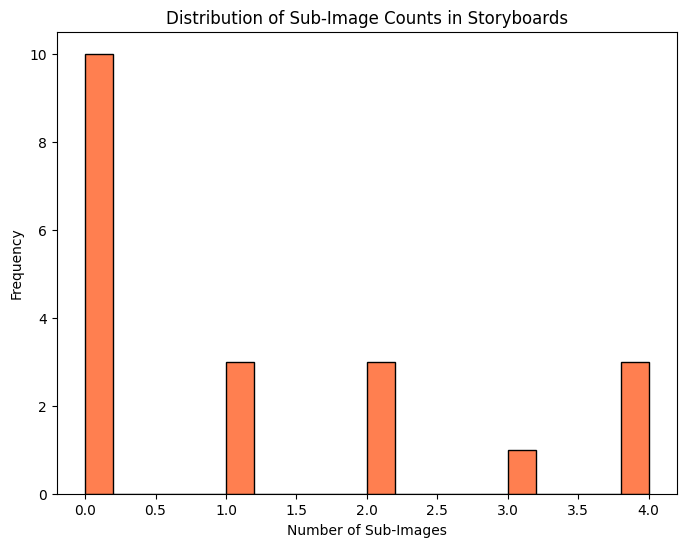

Total number of images: 21
Most common image format: PNG
Most common image mode: RGBA
Most common image width: 3859 pixels
Most common image height: 2171 pixels
Average number of ad images in a single storyboard: 1.2


In [7]:
image_formats = []
image_modes = []
image_sizes = []
sub_image_counts = []

# Loop through all files in the directory
for file in files:
    file_path = os.path.join(storyboard_dir, file)
    if os.path.isfile(file_path) and file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file_path)
        image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        image_formats.append(image.format)
        image_modes.append(image.mode)
        image_sizes.append(image.size)
        sub_image_count = detect_objects(image_cv2)
        sub_image_counts.append(sub_image_count)
        print(f"{file}: {sub_image_count} ad images detected.")

# Analysis of image formats
format_counts = {fmt: image_formats.count(fmt) for fmt in set(image_formats)}
print("Image Format Distribution:", format_counts)

# Analysis of image modes
mode_counts = {mode: image_modes.count(mode) for mode in set(image_modes)}
print("Image Mode Distribution:", mode_counts)

# Analysis of image sizes
widths, heights = zip(*image_sizes)

# Plot the distribution of image widths and heights
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the distribution of sub-image counts
plt.figure(figsize=(8, 6))
plt.hist(sub_image_counts, bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Sub-Image Counts in Storyboards')
plt.xlabel('Number of Sub-Images')
plt.ylabel('Frequency')
plt.show()

# Display basic information about the dataset
print(f"Total number of images: {len(files)}")
print(f"Most common image format: {max(format_counts, key=format_counts.get)}")
print(f"Most common image mode: {max(mode_counts, key=mode_counts.get)}")
print(f"Most common image width: {np.bincount(widths).argmax()} pixels")
print(f"Most common image height: {np.bincount(heights).argmax()} pixels")
print(f"Average number of ad images in a single storyboard: {np.mean(sub_image_counts)}")


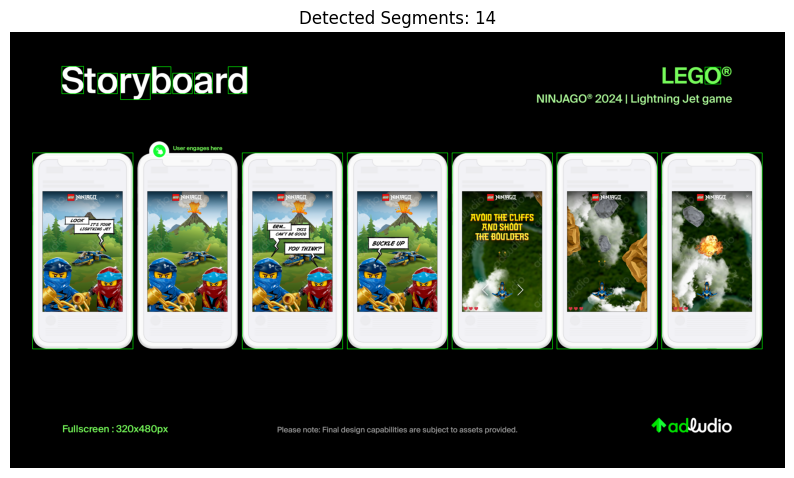

Number of detected ad images: 14


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '../data/adludio storyboard examples/Adludio-LEGO-[UK]-[RFP]-Ninjago24-Gamified-FlyingArcade-FS-V2-sb.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150)

# Apply morphological operations to close gaps in contours
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to identify rectangular segments
rectangles = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(cnt)
    
    # Filter based on aspect ratio and area to exclude text
    if 0.5 < aspect_ratio < 2.0 and area > 5000:
        rectangles.append((x, y, w, h))

# Count the segments
segment_count = len(rectangles)

# Draw rectangles around detected segments
for rect in rectangles:
    x, y, w, h = rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with detected segments
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Detected Segments: {segment_count}')
plt.show()

print(f"Number of detected ad images: {segment_count}")


In [14]:
import os
import cv2
import numpy as np

def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Apply morphological operations to close gaps in contours
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to identify rectangular segments
    rectangles = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(cnt)
        
        # Filter based on aspect ratio and area to exclude text
        if 0.5 < aspect_ratio < 2.0 and area > 5000 and w > 50 and h > 50:
            rectangles.append((x, y, w, h))

    # Count the segments
    segment_count = len(rectangles)

    print(f"Number of detected ad images in {os.path.basename(image_path)}: {segment_count}")
    return segment_count

# Directory containing storyboard examples
directory_path = '../data/adludio storyboard examples/'

# Process each image in the directory and collect segment counts
segment_counts = []
for filename in os.listdir(directory_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(directory_path, filename)
        segment_count = process_image(image_path)
        segment_counts.append(segment_count)

# Calculate average number of detected segments per storyboard
average_segments = sum(segment_counts) / len(segment_counts) if segment_counts else 0
print(f"\nAverage number of detected ad images per storyboard: {average_segments:.2f}")


Number of detected ad images in Adludio-CocaCola-[BR]-[LIVE]-ifood-christmas2033-TapAndHold-FS-V3-sb.png: 10
Number of detected ad images in Adludio-Detran_RS-[BR]-[LIVE]-Carnival_24-User_Choice_Quiz-FS-Version_2-Taxi.png: 10
Number of detected ad images in Adludio-Estee_Lauder-[UK]-[LIVE]-luxury_fragrance-cube_flip-MPU-Version_1.png: 10
Number of detected ad images in Adludio-google-[UK]-[RFP]-brand_saftey-swipe_left_or_right-FS-v1.png: 3
Number of detected ad images in Adludio-LEGO-[UK]-[RFP]-Ninjago24-Gamified-FlyingArcade-FS-V2-sb.png: 14
Number of detected ad images in Adludio-Microsoft-[FR]-[LIVE]-Windows_11_version_2-Swipe-MPU-v2.png: 0
Number of detected ad images in Adludio-Volvo-[UK]-[RFP]-Volvo_Vehicle_Electrification_XC40-Tap-FS-Version_2_AJ.png: 10
Number of detected ad images in Amazon-ThirteenLives_FS_600x900-storyboard.png: 0
Number of detected ad images in bestuy-fs-600x900-tapandhold-storyboard.png: 4
Number of detected ad images in boa_FS_600x900_storyboard.png: 0
Nu